In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('medical_raw_data.csv')
df = df.fillna((0))

print(df) 

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1              2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2              3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3              4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4              5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...        ...         ...                                   ...   
9995        9996       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996        9997       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997        9998       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998        9999       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999       10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                           

In [3]:
df = df.replace(to_replace = {'HighBlood': {'Yes' : 1 , 'No' : 0}})
print (df['HighBlood'])

0       1
1       1
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: HighBlood, Length: 10000, dtype: int64


In [4]:
df = df.replace(to_replace = {'Stroke': {'Yes' : 1 , 'No' : 0}})
print (df['Stroke'])

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Stroke, Length: 10000, dtype: int64


In [5]:
df = df.replace(to_replace = {'Overweight': {'Yes' : (1) , 'No' : (0)}})
df['Overweight'] = df['Overweight'].astype(int)

print (df['Overweight'])

0       0
1       1
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: Overweight, Length: 10000, dtype: int32


In [6]:
df = df.replace(to_replace = {'Arthritis': {'Yes' : 1 , 'No' : 0, 'NA' : 0}})
print (df['Arthritis'])

0       1
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    1
Name: Arthritis, Length: 10000, dtype: int64


In [7]:
df = df.replace(to_replace = {'Diabetes': {'Yes' : 1 , 'No' : 0}})
print (df['Diabetes'])

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: Diabetes, Length: 10000, dtype: int64


In [8]:
df = df.replace(to_replace = {'Hyperlipidemia': {'Yes' : 1 , 'No' : 0}})
print (df['Hyperlipidemia'])

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Hyperlipidemia, Length: 10000, dtype: int64


In [9]:
df = df.replace(to_replace = {'BackPain': {'Yes' : 1 , 'No' : 0}})
print (df['BackPain'])

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: BackPain, Length: 10000, dtype: int64


In [10]:
df = df.replace(to_replace = {'Anxiety': {'Yes' : 1 , 'No' : 0}})
df['Anxiety'] = df['Anxiety'].astype(int)

print (df['Anxiety'])

0       1
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    0
9999    0
Name: Anxiety, Length: 10000, dtype: int32


In [11]:
df = df.replace(to_replace = {'Allergic_rhinitis': {'Yes' : 1 , 'No' : 0}})
print (df['Allergic_rhinitis'])

0       1
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Allergic_rhinitis, Length: 10000, dtype: int64


In [12]:
df = df.replace(to_replace = {'Reflux_esophagitis': {'Yes' : 1 , 'No' : 0}})
print (df['Reflux_esophagitis'])

0       0
1       1
2       0
3       1
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Reflux_esophagitis, Length: 10000, dtype: int64


In [13]:
df = df.replace(to_replace = {'Asthma': {'Yes' : 1 , 'No' : 0}})
print (df['Asthma'])

0       1
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: Asthma, Length: 10000, dtype: int64


In [14]:
df['health_score'] = pd.Series(df.apply(lambda x: x['HighBlood'] + x['Stroke']+ x['Overweight'] + x['Arthritis']+ x['Diabetes'] + x['Hyperlipidemia'] + x['BackPain'] + x['Anxiety'] + x['Reflux_esophagitis']+ x['Asthma'], axis=1))
df['health_score'] = df['health_score'].astype(int)


print (df['health_score'])

0       6
1       3
2       3
3       4
4       1
       ..
9995    3
9996    5
9997    3
9998    2
9999    3
Name: health_score, Length: 10000, dtype: int32


In [15]:
print (df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1              2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2              3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3              4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4              5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...        ...         ...                                   ...   
9995        9996       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996        9997       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997        9998       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998        9999       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999       10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                           

In [16]:
hs = df.loc[ : , 'health_score']

print (hs)

0       6
1       3
2       3
3       4
4       1
       ..
9995    3
9996    5
9997    3
9998    2
9999    3
Name: health_score, Length: 10000, dtype: int32


In [17]:
df['zscore_hs'] = stats.zscore(hs)
df['zscore_hs'].head()

0    1.606055
1   -0.419235
2   -0.419235
3    0.255862
4   -1.769428
Name: zscore_hs, dtype: float64

In [18]:
dv = df.loc[ : , 'Doc_visits']

print (dv)

0       6
1       4
2       4
3       4
4       5
       ..
9995    4
9996    5
9997    4
9998    5
9999    5
Name: Doc_visits, Length: 10000, dtype: int64


In [19]:
df['zscore_dv'] = stats.zscore(dv)
df['zscore_dv'].head()

0    0.944647
1   -0.967981
2   -0.967981
3   -0.967981
4   -0.011667
Name: zscore_dv, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

array([[<AxesSubplot:title={'center':'health_score'}>]], dtype=object)

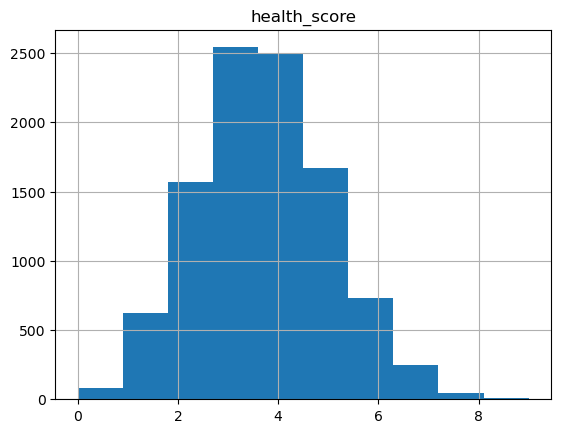

In [21]:
df.hist(['health_score'])

<AxesSubplot:>

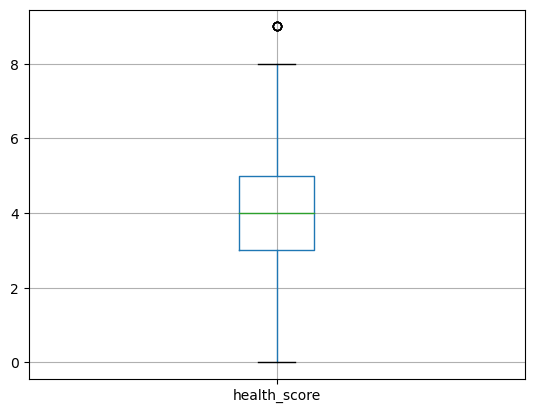

In [22]:
df.boxplot('health_score')

<AxesSubplot:>

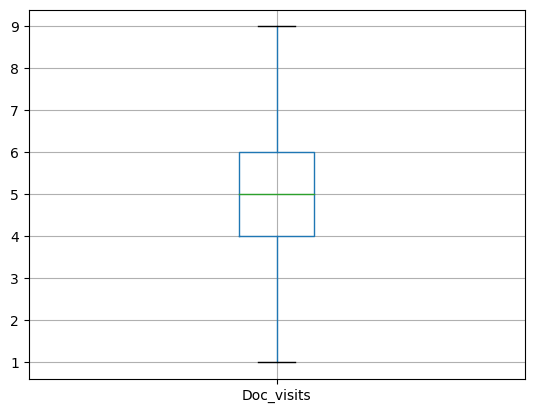

In [23]:
df.boxplot('Doc_visits')

array([[<AxesSubplot:title={'center':'Doc_visits'}>]], dtype=object)

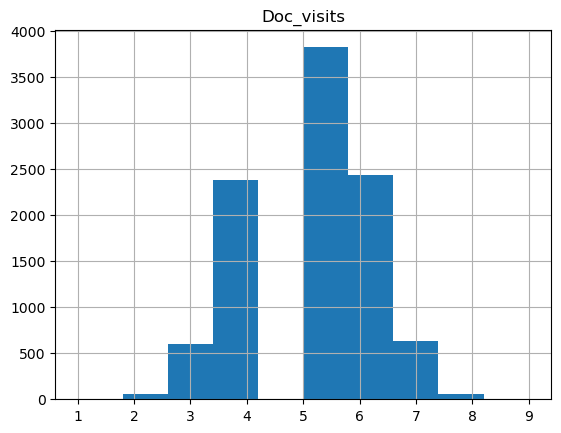

In [24]:
df.hist('Doc_visits')

In [25]:
df['health_score'].notnull().any()

True

In [26]:
df['Doc_visits'].notnull().any()

True

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

array([[<AxesSubplot:title={'center':'zscore_hs'}>]], dtype=object)

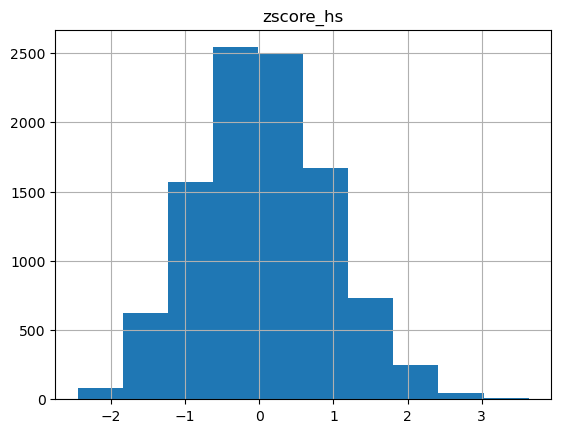

In [28]:
df.hist(['zscore_hs'])

array([[<AxesSubplot:title={'center':'zscore_dv'}>]], dtype=object)

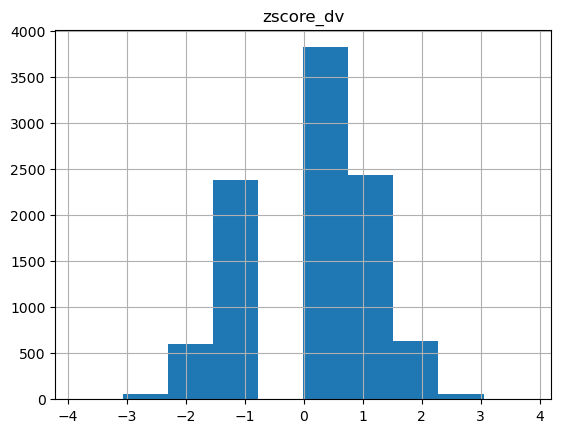

In [29]:
df.hist(['zscore_dv'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [31]:
df['zscore_dv'] = df['zscore_dv'].astype(int)
df['zscore_hs'] = df['zscore_hs'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [33]:
df.drop(df[df['zscore_hs'] > 3].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [34]:
df.drop(df[df['zscore_hs'] < -3].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [35]:
df.drop(df[df['zscore_dv'] > 3].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [36]:
df.drop(df[df['zscore_dv'] < -3].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [37]:
newdf = df[['Doc_visits', 'health_score', 'VitD_levels']]
print (newdf)

      Doc_visits  health_score  VitD_levels
0              6             6    17.802330
1              4             3    18.994640
2              4             3    17.415889
3              4             4    17.420079
4              5             1    16.870524
...          ...           ...          ...
9995           4             3    16.481612
9996           5             5    18.451601
9997           4             3    15.752751
9998           5             2    21.956305
9999           5             3    20.421883

[10000 rows x 3 columns]


In [38]:
newdf.head()

,Doc_visits,health_score,VitD_levels
0,6,6,17.802330
1,4,3,18.994640
2,4,3,17.415889
3,4,4,17.420079
4,5,1,16.870524


In [39]:
newdf_normalized = (newdf-newdf.mean())/newdf.std()

In [40]:
pca = PCA(n_components = newdf.shape[1])
pca.fit(newdf_normalized)
newdf_pca = pd.DataFrame(pca.transform(newdf_normalized), columns = ['p1', 'p2', 'p3'])

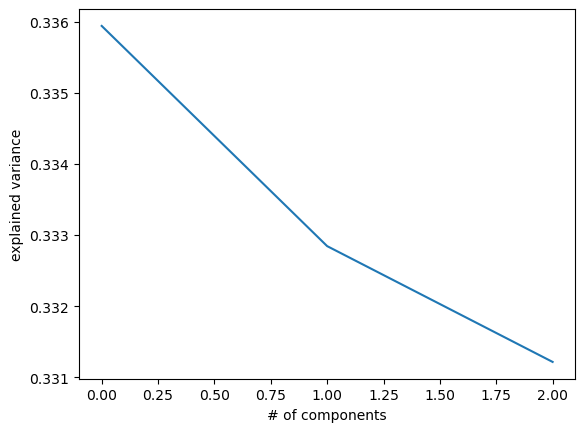

In [41]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of components')
plt.ylabel('explained variance')
plt.show()

In [42]:
cov_matrix = np.dot(newdf_normalized.T, newdf_normalized) / newdf.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

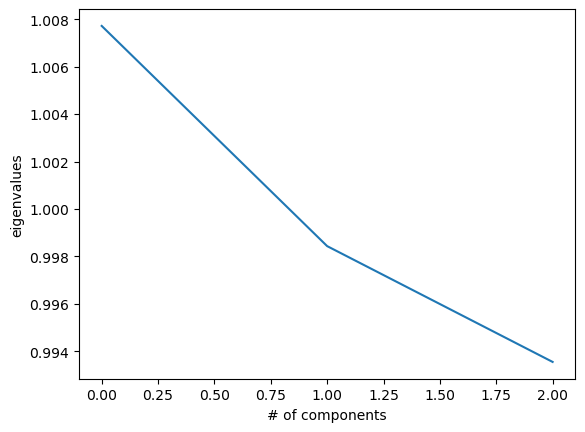

In [43]:
plt.plot(eigenvalues)
plt.xlabel('# of components')
plt.ylabel('eigenvalues')
plt.show()

In [44]:
loading = pd.DataFrame(pca.components_.T,
                      columns = ['p1', 'p2', 'p3'],
                      index = newdf.columns)
loading

,p1,p2,p3
Doc_visits,0.50064,-0.757147,0.419629
health_score,-0.66924,-0.031060,0.742397
VitD_levels,0.54907,0.652506,0.522262


In [45]:
df.to_csv(r'D:\Personal\cleaned_data.csv', index = False)

In [46]:
eigenvalues

[1.0077183476716385, 0.9984324882153788, 0.9935491641130877]